In [0]:
import numpy as np
from google.colab import files

In [0]:
# Defining SVD Function

def SingularValueDecomposition (A):
  u,U = np.linalg.eig(np.dot(A,np.transpose(A)))
  x = np.argsort(u)[::-1]
  U = U[:,x]
  u = np.sort(u)[::-1]


  S = np.sqrt(u).astype('float')
  S1 = np.diag(S)
  # print(S)
  V = np.zeros((np.shape(A)[0],np.shape(A)[1]))
  for i in range(np.shape(A)[1]):
    V[:, i] += S1[i, i]*np.dot(np.linalg.inv(A), U[:, i])
  

  # print(A)
  return (U, S, V.T )

In [0]:
# Generation of Highly Correlated Matrix (A)

Temp = np.random.rand(100, 100)
D = np.diag(np.random.rand(1,100)[0])
A = np.dot(Temp, np.transpose(Temp)) + D
A = A / 100
print(A)

[[0.29925672 0.23857629 0.23705152 ... 0.23170938 0.24475778 0.21421241]
 [0.23857629 0.34543277 0.24513975 ... 0.25061625 0.24986277 0.21811389]
 [0.23705152 0.24513975 0.33430172 ... 0.26498268 0.25290037 0.23318285]
 ...
 [0.23170938 0.25061625 0.26498268 ... 0.34331126 0.22524768 0.2178171 ]
 [0.24475778 0.24986277 0.25290037 ... 0.22524768 0.34608939 0.22770893]
 [0.21421241 0.21811389 0.23318285 ... 0.2178171  0.22770893 0.27199414]]


In [0]:
# Frobenius Norm for Highly Correlated Matrix 

J= np.linalg.norm(A,'fro')
J

25.26239487437546

In [0]:
# Applying SVD On Highly Correlated Matrix on A
U,s,V= SingularValueDecomposition(A)

In [0]:
# Selecting top 10 components for SVD

n_component= 10               # Number of Singular Vectors 
S2=np.diag(s[:n_component])
V1= V[:,:n_component]
print(V1.shape)
U1= U[:,:n_component]
print(U1.shape)
A1= U1.dot(S2.dot(V1.T))
print(A1.shape)
J1= np.linalg.norm(A1,'fro')
J1/J

(100, 10)
(100, 10)
(100, 100)


0.9993743850567282

In [0]:
# Selecting random 10 components for SVD
a2= np.random.randint(low=0, high=99, size=10)
# a2 = [2,5,6,9,45,50,65,71,88,93]
print(a2)
S9 = np.diag(s[a2])
print(S9)
V2 = V[:,a2]
U2 = U[:,a2]

print(U2.shape, V2.shape, S9.shape)

A2= U2.dot(S9.dot(V2.T))
J2= np.linalg.norm(A2,'fro')
J2/J

[50  3 23 71 44  7 55 39 57 64]
[[0.0580301  0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.29172121 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.15318707 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.0219154  0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.07313355 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.24658682
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.0484301  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.09117559 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.04306681 0.       

0.01734937258490318

In [0]:
# Finding number of components required for capturing certain % of data 
ReqComp = np.zeros((1, 21))
component=0
PercComp = np.zeros((1, 21))

for i in range(0, 21, 1):
  value= i*0.05
  p4 = 0
  while p4<value:
    component += 1
    p4 = np.linalg.norm(U[:,:component].dot(np.diag(s[:component]).dot(np.transpose(V[:,:component])))) / J
    
  ReqComp[0, i] += component
  PercComp[0, i] += p4

In [31]:
print(PercComp)

[[0.         0.99886124 0.99893232 0.99900165 0.99906838 0.9991277
  0.99918652 0.99924153 0.99928921 0.99933272 0.99937439 0.99941438
  0.99945265 0.9994869  0.99951954 0.99955008 0.99957898 0.99960566
  0.99963086 0.9996543  1.        ]]


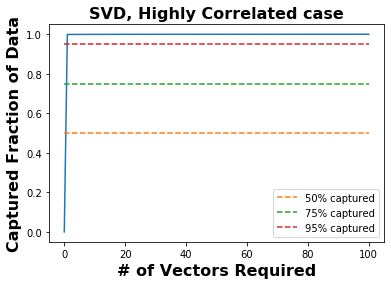

In [0]:
# Plot for Highly Correlated matrix
perc = np.arange(0, 1.05, 0.05)
horzline = np.ones((21, 1))
compline = np.arange(0, 105, 5)

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(ReqComp.T, PercComp.T)
high50, = plt.plot(compline, 0.5*horzline, linestyle = 'dashed', label = '50% captured')
high75, = plt.plot(compline, 0.75*horzline, linestyle = 'dashed', label = '75% captured')
high95, = plt.plot(compline, 0.95*horzline, linestyle = 'dashed', label = '95% captured')
plt.legend(handles = [high50, high75, high95], loc='lower right')
plt.ylabel('Captured Fraction of Data', fontweight="bold", fontsize=16)
plt.xlabel('# of Vectors Required', fontweight="bold", fontsize=16)
plt.title('SVD, Highly Correlated case', fontweight="bold", fontsize=16)
plt.savefig('svdhigh.png')
files.download('svdhigh.png')

In [0]:
# Generating Matrix with Statistically Independent Numbers (B)

B = np.zeros((100, 100))
for i in range(0, np.shape(B)[1]):
  MatrixACol = np.random.rand(100, 1)
  B[:, i] += np.random.uniform(1)*MatrixACol[:, 0]


In [0]:
#Frobenius of Matrix with Statistically Independent Numbers (B)
J5= np.linalg.norm(B,'fro')
J5

57.62055362338255

In [0]:
# Applying SVD On Highly Correlated Matrix
U3,s3,V3= SingularValueDecomposition(B)

In [0]:
# Selecting top 10 components for SVD

n_component= 10               # Number of Singular Vectors 
S3=np.diag(s3[:n_component])
V8= V3[:,:n_component]
print(V1.shape)
U8= U3[:,:n_component]
print(U8.shape)
B1= U8.dot(S3.dot(V8.T))
print(B1.shape)
J3= np.linalg.norm(B1,'fro')
J3/J5

(100, 10)
(100, 10)
(100, 100)


0.9085279772135165

In [0]:
# Selecting random 10 components for SVD
b2= np.random.randint(low=0, high=99, size=10)
# a2 = [2,5,6,9,45,50,65,71,88,93]
print(b2)
S7 = np.diag(s3[b2])
print(S7)
V7 = V3[:,b2]
# V1 = np.transpose(V1)
U7 = U3[:,b2]

print(U7.shape, V7.shape, S7.shape)

B2= U7.dot(S7.dot(V7.T))
J4= np.linalg.norm(B2,'fro')
J4/J5

[34  4 13 22 25 74 72  6 54 49]
[[3.19280482 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         5.18313155 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         4.38214783 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         3.85755771 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         3.69519198 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.15731026
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.2547703  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         5.01072817 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         2.1077943  0.       

0.19247918125463

In [0]:
# Finding number of components required for capturing certain % of data 
ReqComp1 = np.zeros((1, 21))
PercComp1 = np.zeros((1, 21))
component=0
for i in range(0, 21, 1):
  value= i*0.05
  p4 = 0
  while p4<value:
    component += 1
    temp = U3[:,:component].dot(np.diag(s3[:component]).dot(np.transpose(V3[:,:component])))
    p4 = np.linalg.norm(temp)/J5#np.linalg.norm(B, 'fro')
    
  ReqComp1[0, i] += component
  PercComp1[0, i] += p4

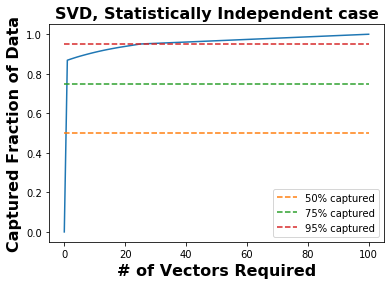

In [0]:
# Plot for Statistically Independent Matrix
plt.figure(1)
plt.plot(ReqComp1.T, PercComp1.T)
high50, = plt.plot(compline, 0.5*horzline, linestyle = 'dashed', label = '50% captured')
high75, = plt.plot(compline, 0.75*horzline, linestyle = 'dashed', label = '75% captured')
high95, = plt.plot(compline, 0.95*horzline, linestyle = 'dashed', label = '95% captured')
plt.legend(handles = [high50, high75, high95], loc='lower right')
plt.ylabel('Captured Fraction of Data', fontweight="bold", fontsize=16)
plt.xlabel('# of Vectors Required', fontweight="bold", fontsize=16)
plt.title('SVD, Statistically Independent case', fontweight="bold", fontsize=16)
plt.savefig('svdstat.png')
files.download('svdstat.png')

In [0]:
print(PercComp1)

[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  25. 100.]]
